# Árbol de regresión

<p style='text-align: justify;'>Los <b>árboles de regresión</b> son métodos predictivos basados en la segmentación en donde le conjunto de datos se divide en diferentes categorías y a los datos que estén dentro de cada intervalo se les asigna directamente un valor establecido en lugar de una etiqueta perteneciente a la categoría donde este ubicado el dato lo cual es la principal diferencia con respecto a su contraparte los Árboles de clasificación.</p>

### Ejemplo de un árbol de regresión
<p style='text-align: justify;'>Veamos juntos la siguiente gráfica donde se han plasmado un conjunto de datos diferentes</p>  
<center><img src="img/ArbReg1.png" width = "50%"></center>
<p style='text-align: justify;'>El procedimiento para generar un árbol de regresión empieza partiendo la totalidad del intervalo de los datos de la variable independiente <b>x</b> en diferentes intervalos pequeños. En nuestro ejemplo aprovecharemos que es posible identificar que los datos parecen estar agrupados en los siguientes cuatro intervalos:</p>  
\begin{equation}
Intervalo_1: 0\le x < 0.25 \\\
Intervalo_2: 0.25\le x < 0.5 \\\
Intervalo_3: 0.5\le x < 0.75 \\\
Intervalo_4: 0.75\le x \le 1.0
\end{equation}
<p style='text-align: justify;'>En la siguiente figura hemos marcado dichos intervalos con la ayuda de las líneas azules punteadas.</p>  
<center><img src="img/ArbReg2.png" width = "50%"></center>
<p style='text-align: justify;'>Todos los valores dentro del primer intervalo son muy cercanos al valor de $y=10$, de igual manera se pueden establecer relaciones similares para los valores de los demás intervalos.</p>  
\begin{equation}
Intervalo_1: y = 10 \\\
Intervalo_2: y = 15 \\\
Intervalo_3: y = 20 \\\
Intervalo_4: y = 15
\end{equation}
<p style='text-align: justify;'>En la siguiente figura es posible identificar estas relaciones viendo las líneas azules gruesas.</p>  
<center><img src="img/ArbReg3.png" width = "50%"></center>
<p style='text-align: justify;'>Posterior a las observaciones que hemos realizado podemos construir un conjunto de reglas basadas en el valor de <b>x</b> que tiene la variable y representarlas en forma de un diagrama como se muestra a continuación:</p> 
<center><img src="img/ArbReg4.png" width = "70%"></center>
<p style='text-align: justify;'>Este diagrama se conoce como árbol de regresión y se utiliza para asignarle un valor numérico a una entrada <b>x</b> de la cuál no se conocía su valor de salida <b>y</b> previamente. Para ejemplificar lo anterior suponga que existe un valor de entrada tal que $x^*=0.4$ para el cuál no se conoce con exactitud su valor de salida $y$, el nuevo valor se encuentra marcado como un punto rojo en la siguiente imagen.</p> 
<center><img src="img/ArbReg5.png" width = "50%"></center>
<p style='text-align: justify;'>Siguiendo el árbol de regresión propuesto podemos identificar lo siguiente:</p>
<center><img src="img/ArbReg6.png" width = "70%"></center>
<p style='text-align: justify;'>Por lo que el valor de salida que se le va a asociar a la entrada de $x=0.4$ será $y=15$.</p>

In [1]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [3]:
# normalizamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [5]:
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_2 = DecisionTreeRegressor(max_depth=2)

In [7]:
# Creando el modelo y entrenando
reg = tree_2.fit(X_train,y_train.reshape(-1))
y_train_hat = tree_2.predict(X_train)
y_test_hat = tree_2.predict(X_test)

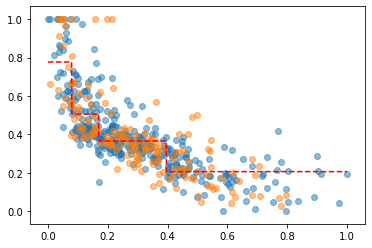

In [14]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline# Le decimos a jupyter que grafique en  el cuaderno

plt.scatter(X_train, y_train,alpha=0.5)
plt.scatter(X_test, y_test,alpha=0.5)

X_plot = np.linspace(0,1,1000).reshape(-1, 1) # 1000 puntos entre 0 y 1 para ver pequeñas diferencias
y_plot = tree_2.predict(X_plot)

plt.plot(X_plot, y_plot,"r--");

In [9]:
from sklearn.tree import export_graphviz
print(export_graphviz(tree_2))
# esto es otra forma de verlo solo que asi es dificil, si vamos a https://dreampuf.github.io/GraphvizOnline
# podremos verlo mejor

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.169\nmse = 0.039\nsamples = 339\nvalue = 0.391"] ;
1 [label="X[0] <= 0.08\nmse = 0.037\nsamples = 110\nvalue = 0.583"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 0.03\nsamples = 31\nvalue = 0.777"] ;
1 -> 2 ;
3 [label="mse = 0.019\nsamples = 79\nvalue = 0.506"] ;
1 -> 3 ;
4 [label="X[0] <= 0.396\nmse = 0.014\nsamples = 229\nvalue = 0.298"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 0.007\nsamples = 132\nvalue = 0.366"] ;
4 -> 5 ;
6 [label="mse = 0.008\nsamples = 97\nvalue = 0.206"] ;
4 -> 6 ;
}


In [10]:
from sklearn.metrics import r2_score
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.686183783521107
Prueba 0.5894049706991193


In [11]:
#Probamos otro arbol con mas profundidad
tree_5 = DecisionTreeRegressor(max_depth=5)


reg = tree_5.fit(X_train,y_train.reshape(-1))
y_train_hat = tree_5.predict(X_train)
y_test_hat = tree_5.predict(X_test)

Entrenamiento 0.7904544931651996
Prueba 0.5972431490552768


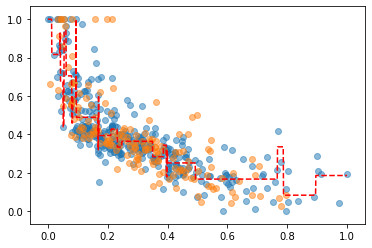

In [15]:
plt.scatter(X_train, y_train,alpha=0.5)
plt.scatter(X_test, y_test,alpha=0.5)

X_plot = np.linspace(0,1,1000).reshape(-1, 1)

y_plot = tree_5.predict(X_plot)

plt.plot(X_plot, y_plot,"r--")

print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

#se ajusta demasiado con una profundidad de 5, tenemos un problema de overfitting

In [13]:
print(export_graphviz(tree_5))

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.169\nmse = 0.039\nsamples = 339\nvalue = 0.391"] ;
1 [label="X[0] <= 0.08\nmse = 0.037\nsamples = 110\nvalue = 0.583"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 0.042\nmse = 0.03\nsamples = 31\nvalue = 0.777"] ;
1 -> 2 ;
3 [label="X[0] <= 0.013\nmse = 0.018\nsamples = 12\nvalue = 0.866"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 2\nvalue = 1.0"] ;
3 -> 4 ;
5 [label="X[0] <= 0.039\nmse = 0.017\nsamples = 10\nvalue = 0.839"] ;
3 -> 5 ;
6 [label="mse = 0.017\nsamples = 8\nvalue = 0.817"] ;
5 -> 6 ;
7 [label="mse = 0.005\nsamples = 2\nvalue = 0.928"] ;
5 -> 7 ;
8 [label="X[0] <= 0.053\nmse = 0.03\nsamples = 19\nvalue = 0.722"] ;
2 -> 8 ;
9 [label="X[0] <= 0.051\nmse = 0.02\nsamples = 5\nvalue = 0.626"] ;
8 -> 9 ;
10 [label="mse = 0.014\nsamples = 4\nvalue = 0.672"] ;
9 -> 10 ;
11 [label="mse = 0.0\nsamples = 1\nvalue = 0.44"] ;
9 -> 11 ;
12 [label="X[0] <= 0.061\nmse = 0.029\nsamples = 14\nvalue =